In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
from sklearn.externals import joblib 

# Breast Cancer prediction

In [2]:
columns = ["Class", "age", "menopause", "tumor_size","inv_nodes", "node_caps", "deg_malig", "breast", "breast_quad","irradiat"]

In [3]:
bc_data = pd.read_csv("datasets/breast-cancer.csv", names = columns)

In [4]:
bc_data.head()

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [5]:
bc_data = bc_data.dropna()

In [6]:
print("================================================")
print("tumor_size : ", bc_data["tumor_size"].unique())
print()
print("age : ", bc_data["age"].unique())
print()
print("Class : ", bc_data["Class"].unique())
print()
print("menopause : ", bc_data["menopause"].unique())
print()
print("inv_nodes : ", bc_data["inv_nodes"].unique())
print()
print("node_caps : ", bc_data["node_caps"].unique())
print()
print("deg_malig : ", bc_data["deg_malig"].unique())
print()
print("breast : ", bc_data["breast"].unique())
print()
print("breast_quad : ", bc_data["breast_quad"].unique())
print()
print("irradiat : ", bc_data["irradiat"].unique())
print("================================================")


tumor_size :  ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']

age :  ['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']

Class :  ['no-recurrence-events' 'recurrence-events']

menopause :  ['premeno' 'ge40' 'lt40']

inv_nodes :  ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']

node_caps :  ['no' 'yes' '?']

deg_malig :  [3 2 1]

breast :  ['left' 'right']

breast_quad :  ['left_low' 'right_up' 'left_up' 'right_low' 'central' '?']

irradiat :  ['no' 'yes']


In [7]:
## Drop rows with node_caps == '?'
bc_data = bc_data[bc_data["node_caps"] != '?']
bc_data = bc_data[bc_data["breast_quad"] != '?']



## Mapping:

## 1. Class:
no-recurrence-events = 0

recurrence-events = 1

## 2. menopause:
premeno = 0

ge40 = 1

lt40 = 2

## 3. tumor_size:
'0-4'   = 0

'5-9'   = 1

'10-14' = 2

'15-19' = 3

'20-24' = 4

'25-29' = 5

'30-34' = 6

'35-39' = 7

'40-44' = 8

'45-49' = 9

'50-54' = 10
 
## 4. inv_nodes:

'0-2'   = 0

'3-5'   = 1

'6-8'   = 2

'9-11'  = 3

'12-14' = 4

'15-17' = 5

'24-26' = 6

## 5. breast:

'left' = 0

'right' = 1
 
## 6. breast_quad:

'left_low' = 0

'right_up' = 1

'left_up'  = 2

'right_low'= 3

'central'  = 4

## 7. irradiat:

'no' = 0

'yes' = 1

## 8. node_caps:

'no' = 0

'yes' = 1

## 9. age:

'20-29' = 0

'30-39' = 1

'40-49' = 2

'50-59' = 3

'60-69' = 4

'70-79' = 5



In [8]:
menopause_dict = {'premeno': 0, 'ge40': 1, 'lt40': 2}
Class_dict = {"no-recurrence-events": 0,"recurrence-events": 1}
tumor_size_dict = {'0-4': 0, '5-9': 1, '10-14': 2, '15-19':3, '20-24': 4,'25-29': 5,'30-34': 6, '35-39': 7, '40-44':8, '45-49': 9, '50-54':10}
inv_nodes_dict = {'0-2':0,'3-5':1,'6-8':2,'9-11':3,'12-14':4,'15-17':5,'24-26':6}
breast_dict = {'left':0, 'right':1}
breast_quad_dict = {'left_low':0, 'right_up':1, 'left_up':2, 'right_low':3,'central': 4}
irradiat_dict = {'no': 0, 'yes': 1}
node_caps_dict = {'no': 0, 'yes': 1}
age_dict = {'20-29':0, '30-39': 1, '40-49':2, '50-59':3, '60-69':4, '70-79':5}

In [9]:
bc_data.Class = bc_data.Class.replace(Class_dict)
bc_data.menopause = bc_data.menopause.replace(menopause_dict)
bc_data.tumor_size = bc_data.tumor_size.replace(tumor_size_dict)
bc_data.inv_nodes = bc_data.inv_nodes.replace(inv_nodes_dict)
bc_data.breast = bc_data.breast.replace(breast_dict)
bc_data.breast_quad = bc_data.breast_quad.replace(breast_quad_dict)
bc_data.irradiat = bc_data.irradiat.replace(irradiat_dict)
bc_data.node_caps = bc_data.node_caps.replace(node_caps_dict)
bc_data.age = bc_data.age.replace(age_dict)


In [10]:
bc_data.head()

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,0,1,0,6,0,0,3,0,0,0
1,0,2,0,4,0,0,2,1,1,0
2,0,2,0,4,0,0,2,0,0,0
3,0,4,1,3,0,0,2,1,2,0
4,0,2,0,0,0,0,2,1,3,0


In [11]:
X_bc = bc_data.drop("Class", axis = 1)
y_bc = bc_data["Class"]

In [19]:
X_bc.columns

Index(['age', 'menopause', 'tumor_size', 'inv_nodes', 'node_caps', 'deg_malig',
       'breast', 'breast_quad', 'irradiat'],
      dtype='object')

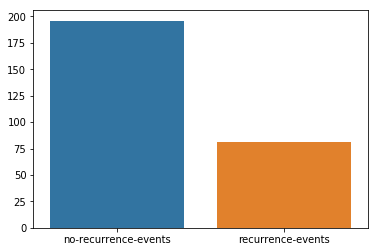

In [12]:
sns.barplot(x= ['no-recurrence-events','recurrence-events'], y=[len(y_bc[y_bc == 0]),len(y_bc[y_bc == 1])])

In [13]:
from sklearn.model_selection import train_test_split
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, test_size = 0.20)

In [14]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', gamma = 'scale')
svclassifier.fit(X_bc_train, y_bc_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
y_pred = svclassifier.predict(X_bc_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_bc_test,y_pred))
print(classification_report(y_bc_test,y_pred))

[[36  3]
 [15  2]]
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        39
           1       0.40      0.12      0.18        17

   micro avg       0.68      0.68      0.68        56
   macro avg       0.55      0.52      0.49        56
weighted avg       0.61      0.68      0.61        56



In [17]:
with open('models/bc_svm.pkl', 'wb') as f:
    pickle.dump(svclassifier, f)

# =======================================

In [20]:
loaded_model = pickle.load(open("models/bc_svm.pkl", 'rb'))

In [37]:
y_pred = loaded_model.predict(X_bc_test.iloc[15].values.reshape(1, -1))

In [39]:
y_pred[0]

1

In [27]:
X_bc_test.iloc[0].values

array([2, 0, 5, 0, 0, 2, 1, 2, 0])

# Fertility prediction

In [10]:
columns = ["Season", "Age", "ChildDisease", "Accident", "Surgury", "HighFever", "Alcohol", "Smoking", "SittingHours", "Output"]

In [14]:
fer_data = pd.read_csv("datasets/FertilityData.csv", names = columns)

# Mapping

Season in which the analysis was performed. 1) winter, 2) spring, 3) Summer, 4) fall. (-1, -0.33, 0.33, 1)

Age at the time of analysis. 18-36 (0, 1)

Childish diseases (ie , chicken pox, measles, mumps, polio) 1) yes, 2) no. (0, 1)

Accident or serious trauma 1) yes, 2) no. (0, 1)

Surgical intervention 1) yes, 2) no. (0, 1)

High fevers in the last year 1) less than three months ago, 2) more than three months ago, 3) no. (-1, 0, 1)

Frequency of alcohol consumption 1) several times a day, 2) every day, 3) several times a week, 4) once a week, 5) hardly ever or never (0, 1)

Smoking habit 1) never, 2) occasional 3) daily. (-1, 0, 1)

Number of hours spent sitting per day ene-16 (0, 1)

Output: Diagnosis normal (N), altered (O) 

In [15]:
fer_data.head()

,Season,Age,ChildDisease,Accident,Surgury,HighFever,Alcohol,Smoking,SittingHours,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [16]:
fer_data.Output = fer_data.Output.replace({'N':0,'O':1})


In [17]:
fer_data.head()

,Season,Age,ChildDisease,Accident,Surgury,HighFever,Alcohol,Smoking,SittingHours,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,1
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,0
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,1


In [18]:
X_fer = fer_data.drop("Output", axis = 1)
y_fer = fer_data["Output"]

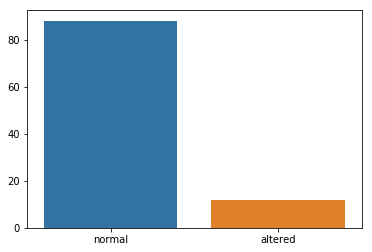

In [19]:
sns.barplot(x= ['normal','altered'], y=[len(y_fer[y_fer == 0]),len(y_fer[y_fer == 1])])

In [22]:
from sklearn.model_selection import train_test_split
X_fer_train, X_fer_test, y_fer_train, y_fer_test = train_test_split(X_fer, y_fer, test_size = 0.20)

In [23]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', gamma = 'scale')
svclassifier.fit(X_fer_train, y_fer_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
y_pred = svclassifier.predict(X_fer_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_fer_test,y_pred))
print(classification_report(y_fer_test,y_pred))

[[17  0]
 [ 3  0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       0.00      0.00      0.00         3

   micro avg       0.85      0.85      0.85        20
   macro avg       0.42      0.50      0.46        20
weighted avg       0.72      0.85      0.78        20



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
with open('models/fer_svm.pkl', 'wb') as f:
    pickle.dump(svclassifier, f)